In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [44]:
# import some data to play with
df = pd.read_csv('/content/Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

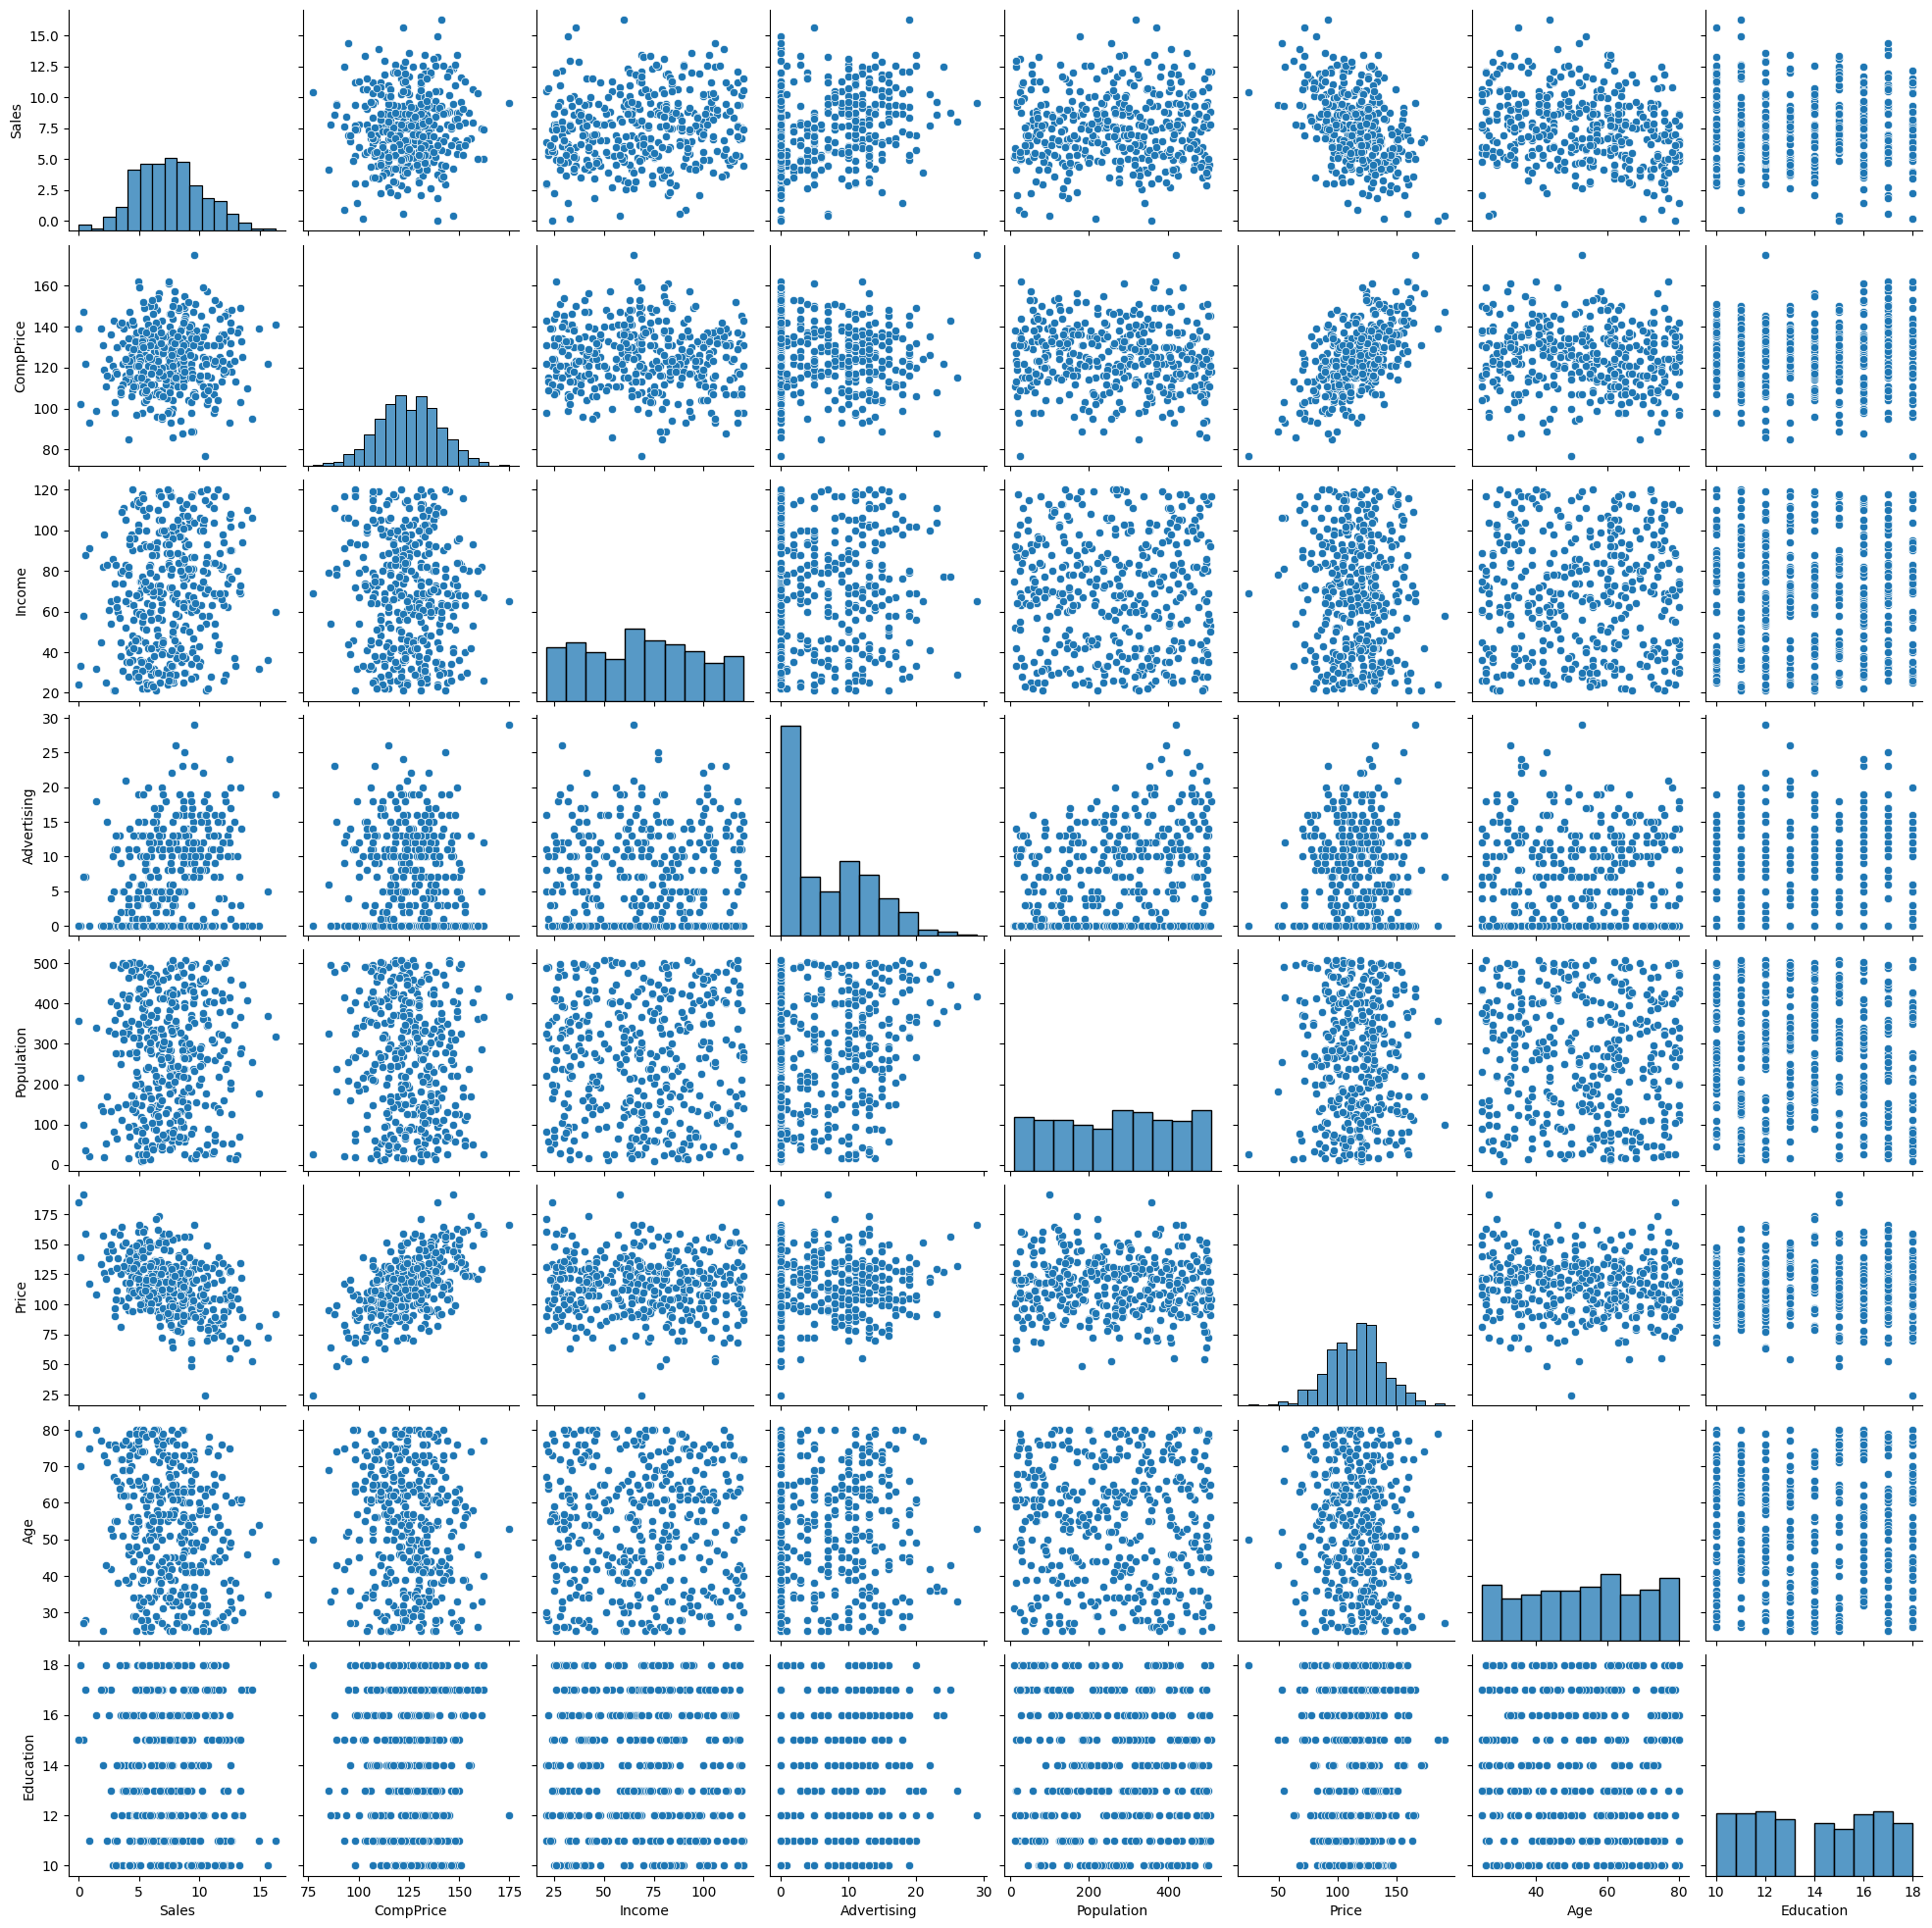

In [8]:
import seaborn as sns
sns.pairplot(df)


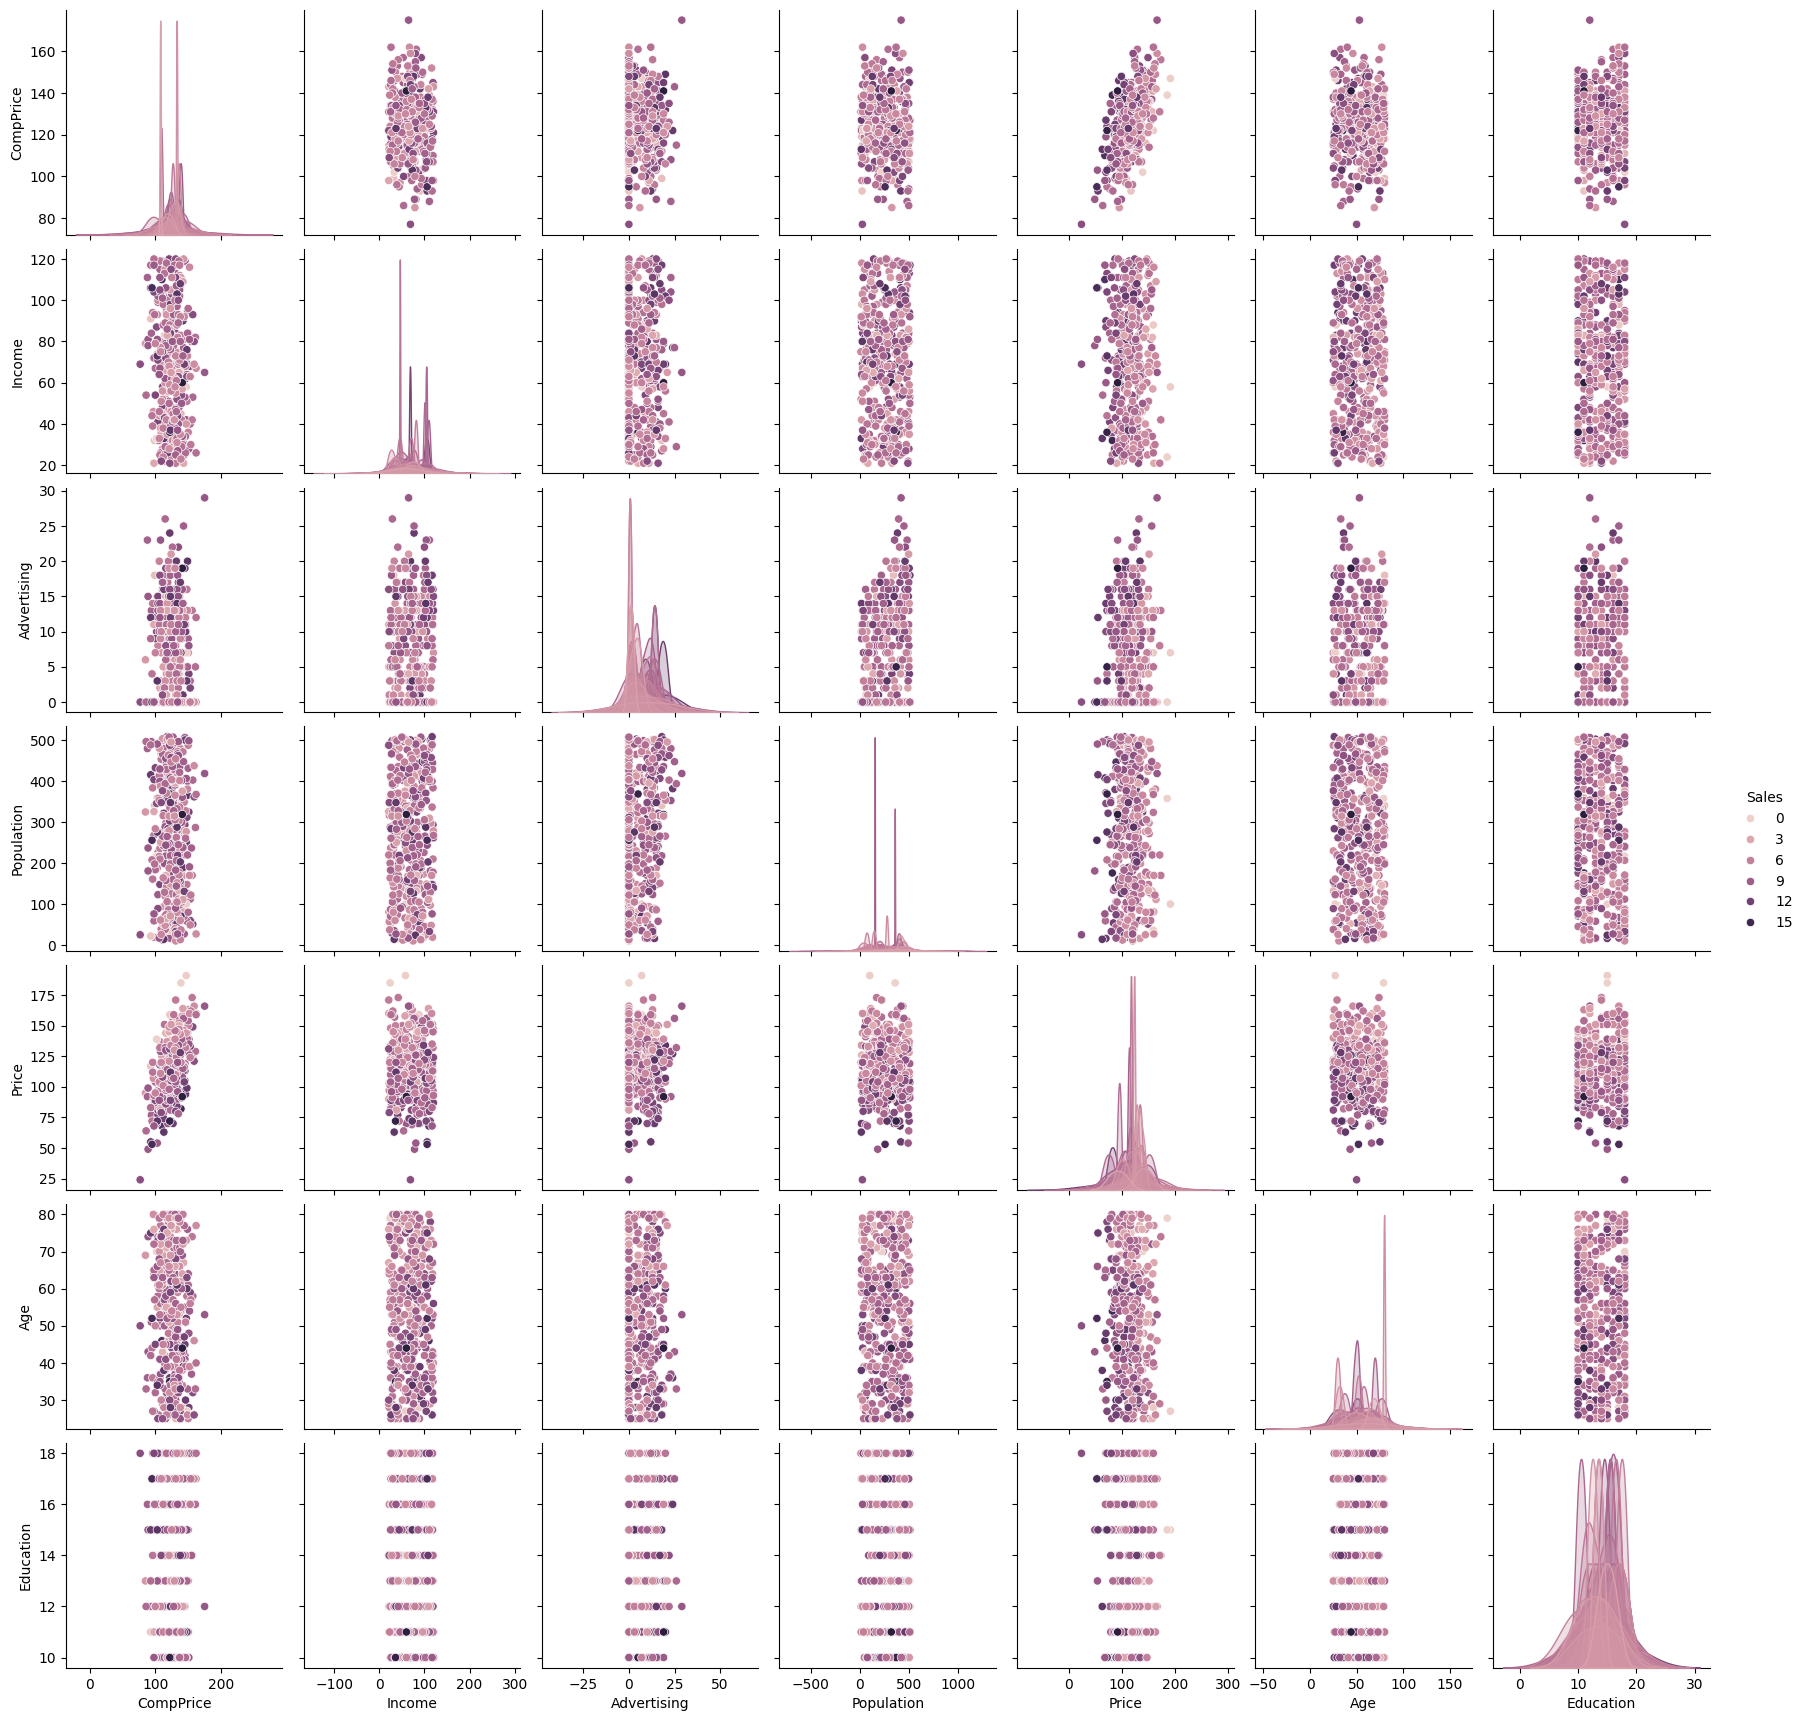

In [9]:
sns.pairplot(data = df, hue = 'Sales')

In [10]:
corr = df.corr()
corr

<ipython-input-10-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [45]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [46]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [47]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [15]:
df['Sales'].max()

16.27

In [16]:
df['Sales'].min()

0.0

In [48]:
import numpy as np
Condition = []
for row in df['Sales']:
    if row > 10 :
        Condition.append('Good')
    else:
        Condition.append('Bad')

In [49]:
df['SALES'] = Condition

In [50]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,SALES
0,9.50,138,73,11,276,120,3,42,17,1,1,Bad
1,11.22,111,48,16,260,83,1,65,10,1,1,Good
2,10.06,113,35,10,269,80,2,59,12,1,1,Good
3,7.40,117,100,4,466,97,2,55,14,1,1,Bad
4,4.15,141,64,3,340,128,3,38,13,1,0,Bad


In [51]:
x=df.drop(['Sales','SALES'],axis = 1)
y=df['SALES']

In [21]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [22]:
y

0       Bad
1      Good
2      Good
3       Bad
4       Bad
       ... 
395    Good
396     Bad
397     Bad
398     Bad
399     Bad
Name: SALES, Length: 400, dtype: object

In [23]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'SALES']

In [52]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
from sklearn import tree

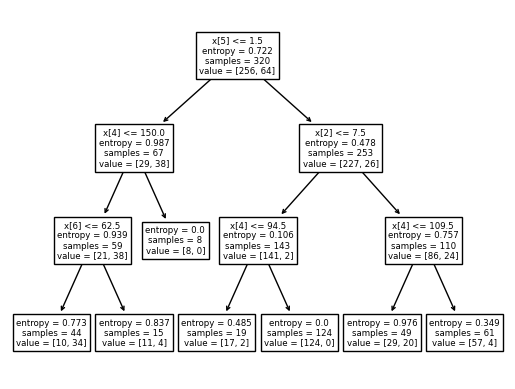

In [27]:
#PLot the decision tree
tree.plot_tree(model);


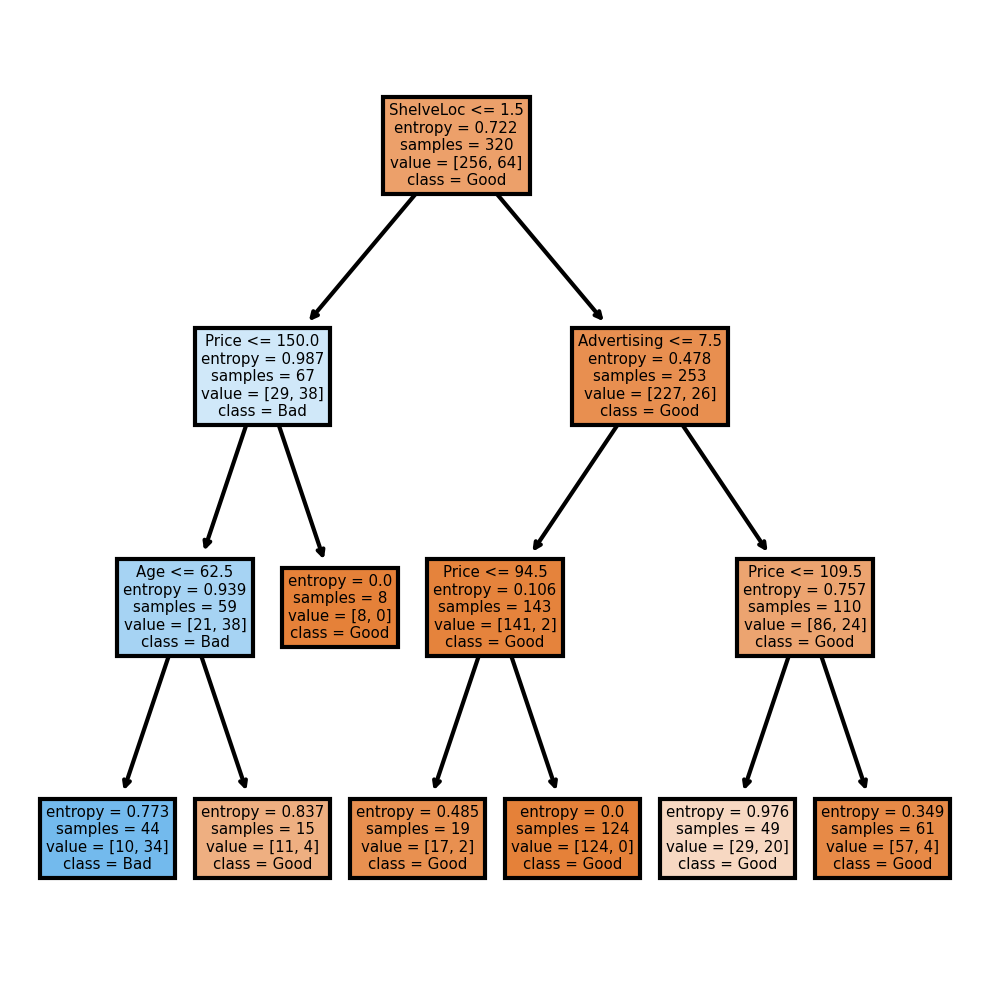

In [28]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']
cn=['Good', 'Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [29]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

Bad     69
Good    11
dtype: int64

In [30]:
preds

array(['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good',
       'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad'],
      dtype=object)

In [31]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Bad,Good
SALES,,
Bad,60,6
Good,9,5


In [32]:
# Accuracy
np.mean(preds==y_test)

0.8125

### Building Decision Tree Classifier (CART) using Gini Criteria

In [33]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [53]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
#Prediction and computing the accuracy
pred_gini=model_gini.predict(x_test)
np.mean(pred_gini==y_test)

0.75

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,pred_gini)
acc = accuracy_score(y_test,pred_gini)
print(cm)
print(acc)

[[55 11]
 [ 9  5]]
0.75


#### Decision Tree Regression Example

In [41]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [65]:
df1 = df.copy()


In [66]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,SALES
0,9.50,138,73,11,276,120,3,42,17,1,1,Bad
1,11.22,111,48,16,260,83,1,65,10,1,1,Good
2,10.06,113,35,10,269,80,2,59,12,1,1,Good
3,7.40,117,100,4,466,97,2,55,14,1,1,Bad
4,4.15,141,64,3,340,128,3,38,13,1,0,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,Good
396,6.14,139,23,3,37,120,2,55,11,0,1,Bad
397,7.41,162,26,12,368,159,2,40,18,1,1,Bad
398,5.94,100,79,7,284,95,3,50,12,1,1,Bad


In [70]:
X = df1.iloc[:,1:11]

In [71]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [74]:
Y = df1.iloc[:,0:1]

In [75]:
Y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [76]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [78]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, Y_train)

DecisionTreeRegressor()

In [81]:
#Prediction and computing the accuracy
pred_model1=model1.predict(X_test)
pred_model1

array([ 7.74,  6.18,  8.75,  5.07,  8.57,  5.56, 12.49,  9.33,  6.54,
       11.22,  7.74,  7.32,  6.18,  7.43, 12.66,  6.23,  9.39,  8.47,
        6.52,  6.85, 10.64,  8.61,  8.74, 12.61,  5.87,  4.69, 10.49,
        5.99, 12.29, 12.13, 12.98,  9.71, 11.22,  8.03,  9.16,  8.61,
        7.74,  5.99,  7.37,  8.31,  6.5 ,  6.8 ,  5.56,  7.99,  6.03,
       10.06, 12.01,  4.83,  6.43,  4.53,  2.67,  6.38, 10.66,  4.42,
        2.05, 11.22, 10.81,  6.53, 10.21,  3.72,  5.94,  6.56,  7.71,
        7.95,  4.88, 10.98, 10.49,  4.62,  7.96, 10.  ,  8.68,  8.98,
        7.56,  5.52,  6.68, 10.01,  4.68,  5.64,  3.42,  7.8 ])

In [84]:
Y_test

,Sales
132,9.54
390,5.47
310,9.53
3,7.40
248,5.36
...,...
361,8.68
197,2.52
23,5.87
54,4.90


In [85]:
#Find the accuracy
model1.score(X_test,Y_test)

0.3456171538299453

In [ ]:
pd.crosstab(y_test,preds)